In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [2]:
# Borrar columnas innecesarias
# describe()
# Max, min, std
alt = pd.read_csv("alturas.csv")

In [3]:
alt.head()
alt.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [4]:
alt.describe()

,esp,por,swe,fra
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,170.120040,164.585743,182.446293,170.059354
std,19.915349,24.710109,24.919607,20.280489
min,96.737075,78.860028,86.022559,78.806492
25%,156.657101,147.925539,165.320591,156.544134
50%,170.377533,164.534573,182.654178,169.837293
75%,183.614256,181.044152,199.405632,183.697008
max,259.036674,257.490308,274.217179,255.856842


In [5]:
alt.head()

,esp,por,swe,fra
0,148.785669,132.310802,171.078003,149.357188
1,131.931630,153.214966,172.762519,169.872371
2,191.057791,206.041381,181.082132,157.568242
3,190.935714,193.306879,234.199745,157.811687
4,160.676666,126.244244,207.681445,167.986754


In [6]:
alt.describe()

,esp,por,swe,fra
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,170.120040,164.585743,182.446293,170.059354
std,19.915349,24.710109,24.919607,20.280489
min,96.737075,78.860028,86.022559,78.806492
25%,156.657101,147.925539,165.320591,156.544134
50%,170.377533,164.534573,182.654178,169.837293
75%,183.614256,181.044152,199.405632,183.697008
max,259.036674,257.490308,274.217179,255.856842


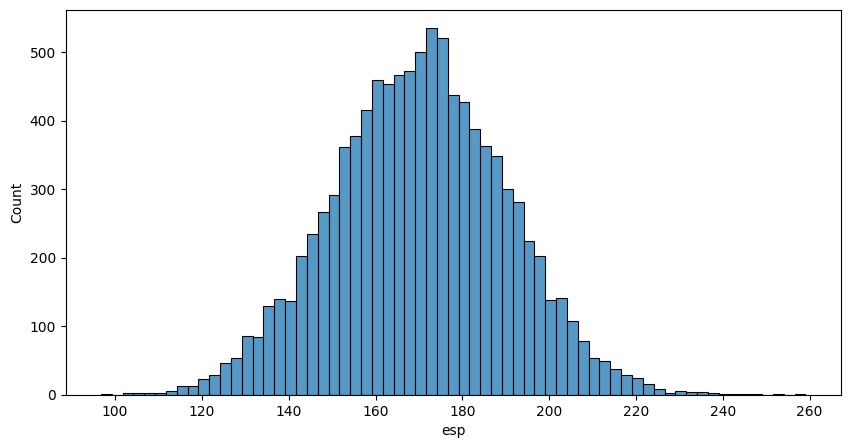

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(alt['esp']);


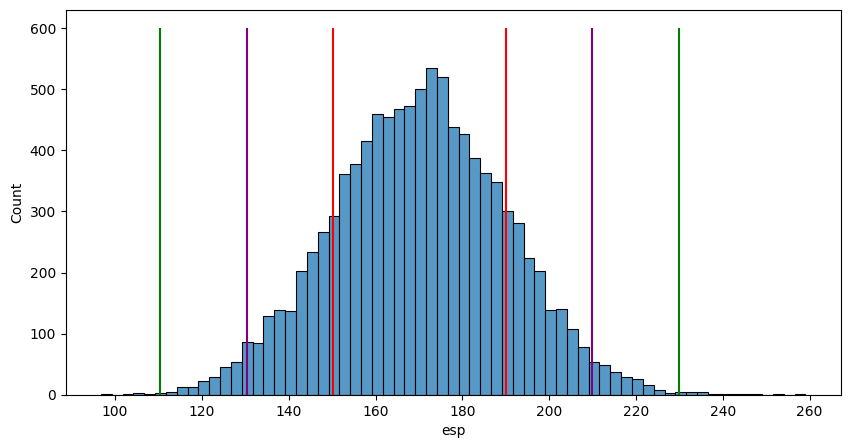

In [8]:
fig = plt.figure(figsize=(10,5))
sns.histplot(alt['esp']); # esp por swe fra

colores = ['r', 'purple', 'green']
for i, j in enumerate(colores):
    plt.vlines(alt['esp'].mean()+(i + 1)*alt['esp'].std(), 0, 600, colors=j)
    plt.vlines(alt['esp'].mean()-(i + 1)*alt['esp'].std(), 0, 600,colors=j)




![imagen](normal.jpg)

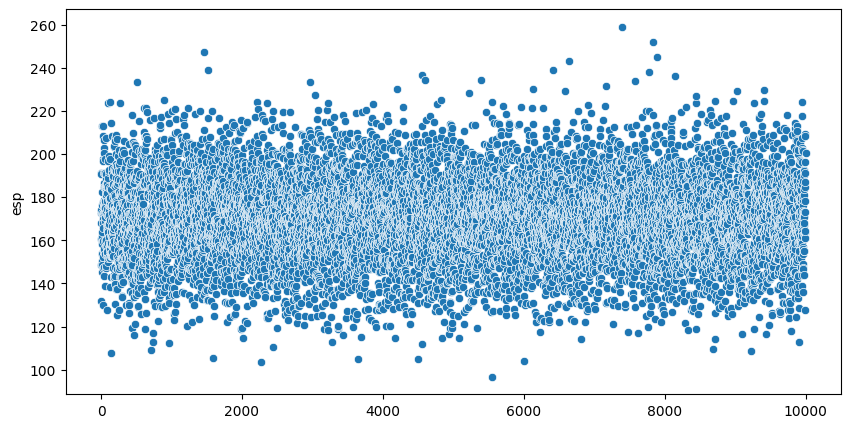

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

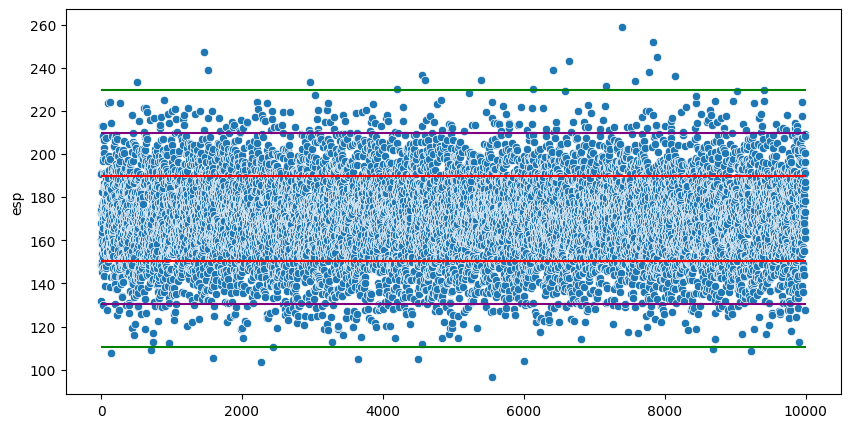

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

colores = ['r', 'purple', 'g']

for i in range(3):
    plt.hlines(alt['esp'].mean()+(i + 1)*alt['esp'].std(), 0, 10000, colors=colores[i])
    plt.hlines(alt['esp'].mean()-(i + 1)*alt['esp'].std(), 0, 10000,colors=colores[i])


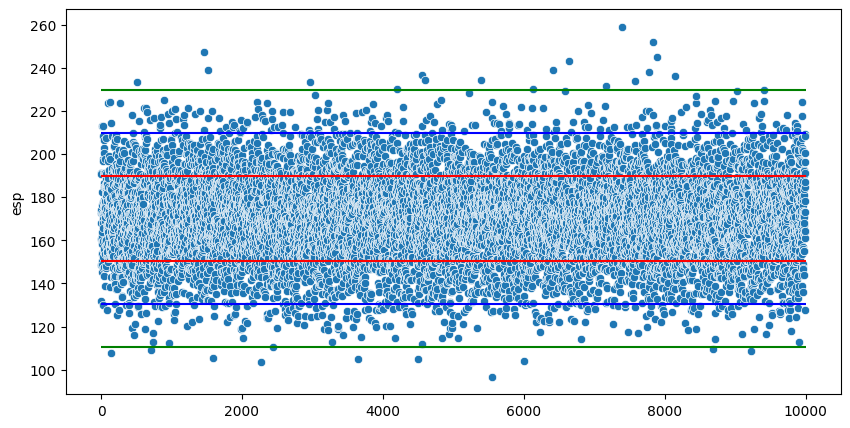

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

c = ["r", "b", "g"]
n = [1,2,3]

for r in range(3):
    plt.hlines(alt['esp'].mean()+n[r]*alt['esp'].std(), 0, 10000, colors=c[r])
    plt.hlines(alt['esp'].mean()-n[r]*alt['esp'].std(), 0, 10000,colors=c[r])

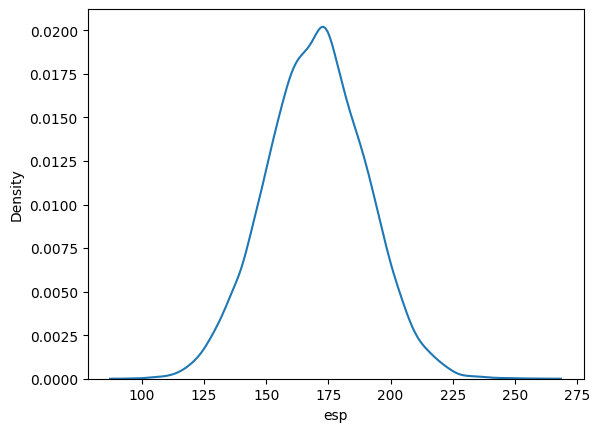

In [12]:
sns.kdeplot(alt['esp']);

<Figure size 50000x20000 with 0 Axes>

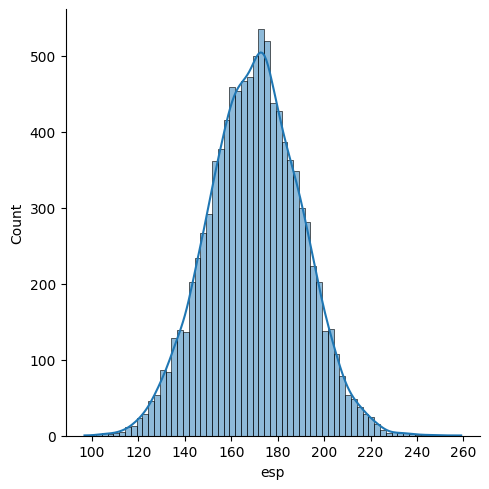

In [13]:
plt.figure(figsize=(500,200))
sns.displot(data=alt, x="esp", kde=True)

C:\Users\pabma\AppData\Local\Temp\ipykernel_28024\2857856248.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alt['esp'], shade=True);


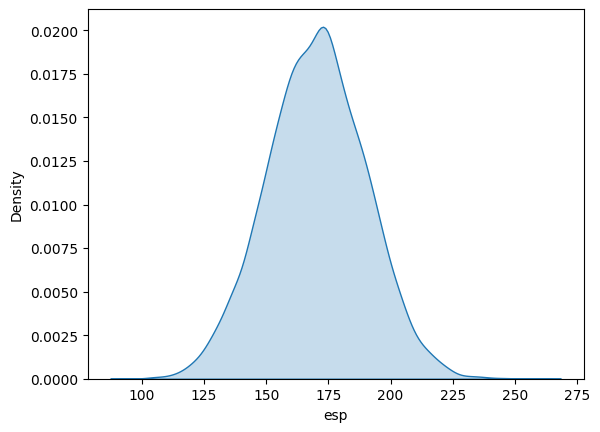

In [14]:
sns.kdeplot(alt['esp'], shade=True);

In [15]:
# Supongamos que en lugar de conseguir la altura de las 10.000 personas solo tenemos una muestra de 10, 30, 50, 300 personas... (muestra)
# ¿Cómo podemos estimar la media y varianza de ese grupo de 10.000 personas (población) 
# Varianza a "mano" vs .std
#np.random.seed(42)
errores = []

for _ in range(1000):
    media_muestra = alt['esp'].sample(50).mean()
    media_global = alt['esp'].mean()
    error = abs(media_muestra - media_global)
    errores.append(error)

errores = pd.DataFrame(errores)
errores.mean()

0    2.246747
dtype: float64

In [16]:
samples = []

for i in range(1000):
    muestra = alt['esp'].sample(50)
    min_max = (abs(muestra.max() + muestra.min()))/2
    error = abs(min_max - alt['esp'].mean())
    samples.append(error)

np.array(samples).mean()

5.108004852784099

In [17]:
np.random.seed(1100)
from scipy.stats import ttest_1samp
ttest_1samp([216, 214, 216], alt['esp'].mean())

TtestResult(statistic=67.81993992103126, pvalue=0.0002173419678840807, df=2)

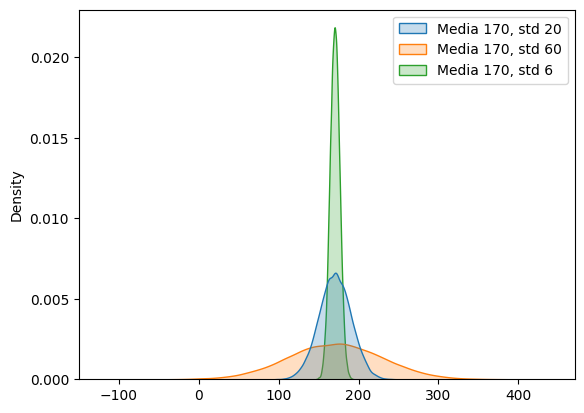

In [25]:
samples = np.random.normal(170, 20, 50000)
samples_std_60 = np.random.normal(170, 60, 50000)
samples_std_6 = np.random.normal(170, 6, 50000)
sm = pd.DataFrame()
sm['Media 170, std 20'] = samples
sm['Media 170, std 60'] = samples_std_60
sm['Media 170, std 6'] = samples_std_6
sns.kdeplot(sm, fill=True);


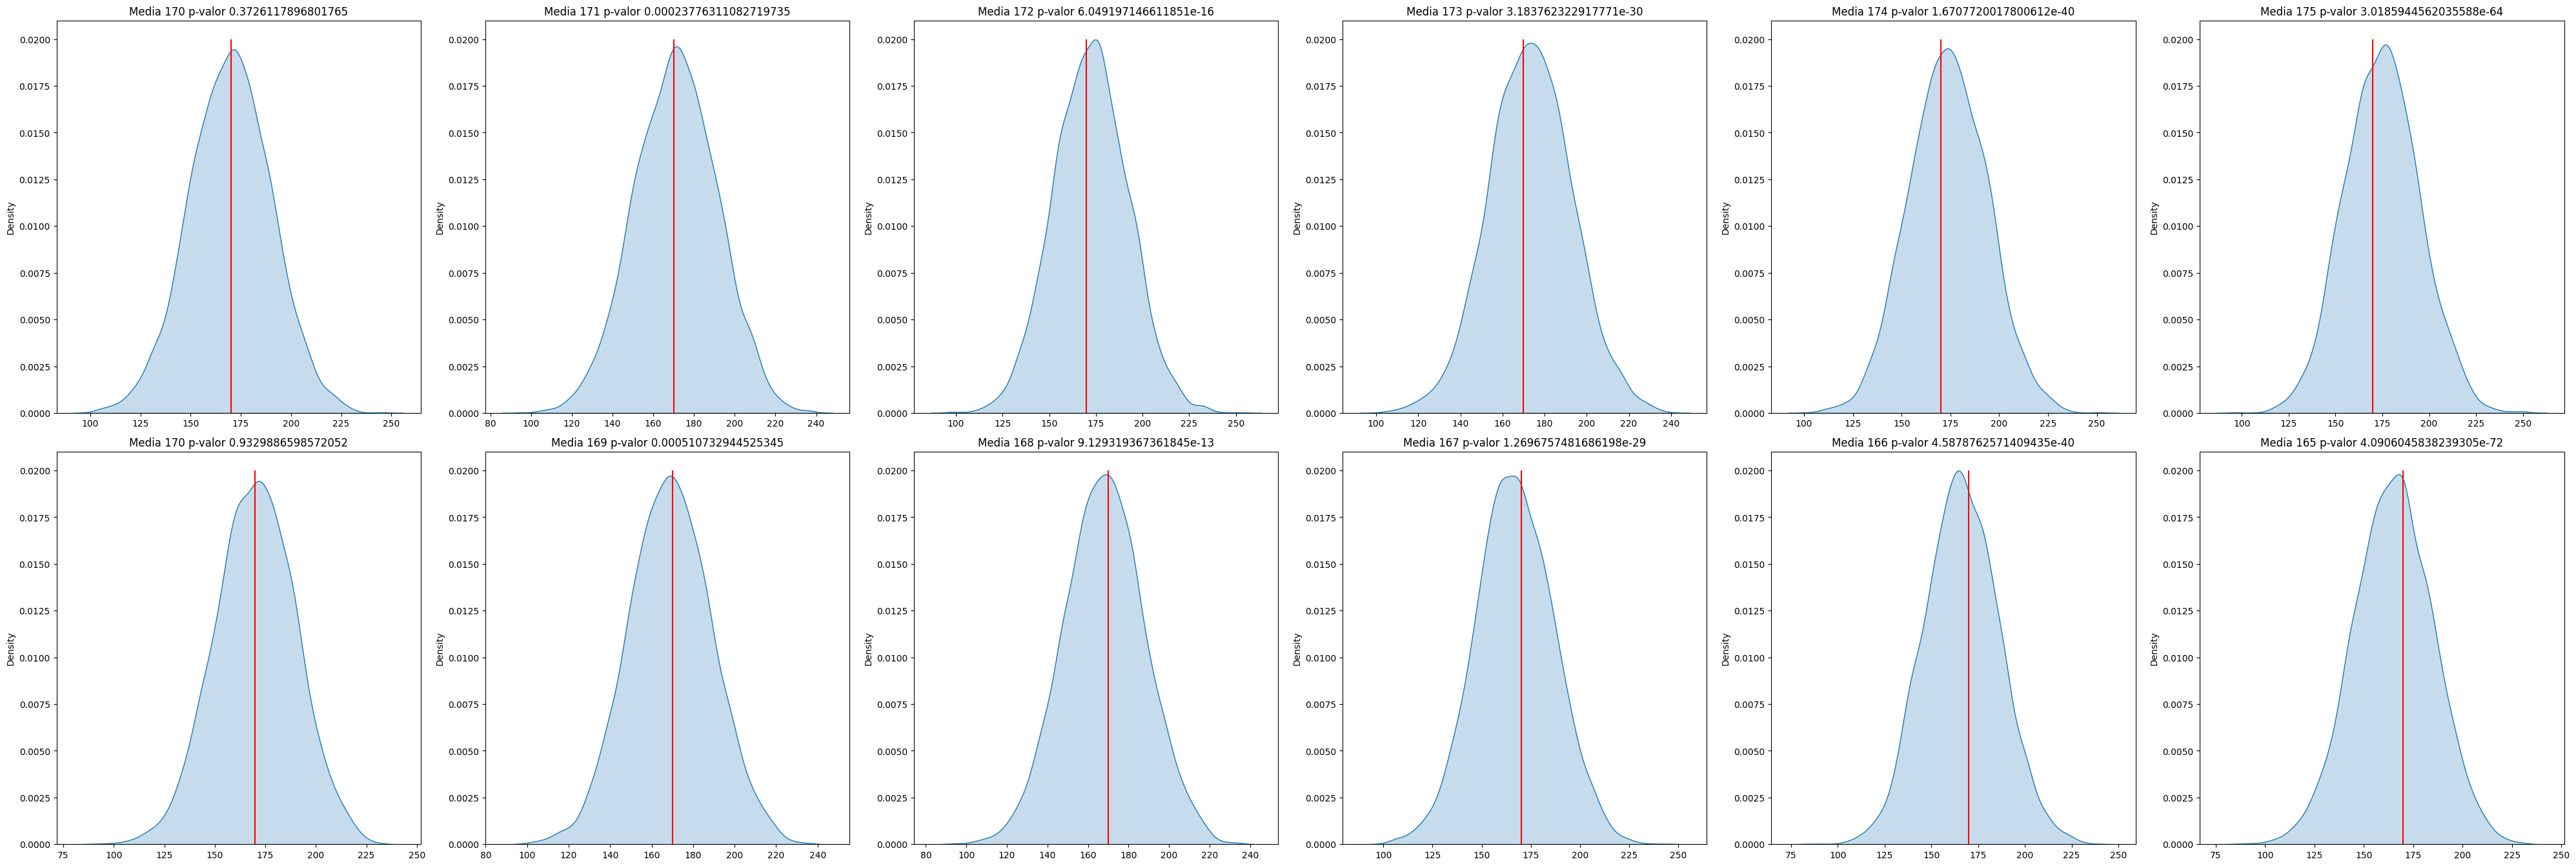

In [19]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(14)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 20, 5000)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.02, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))
    
fig.tight_layout(pad=1) # para evitar solapamientos

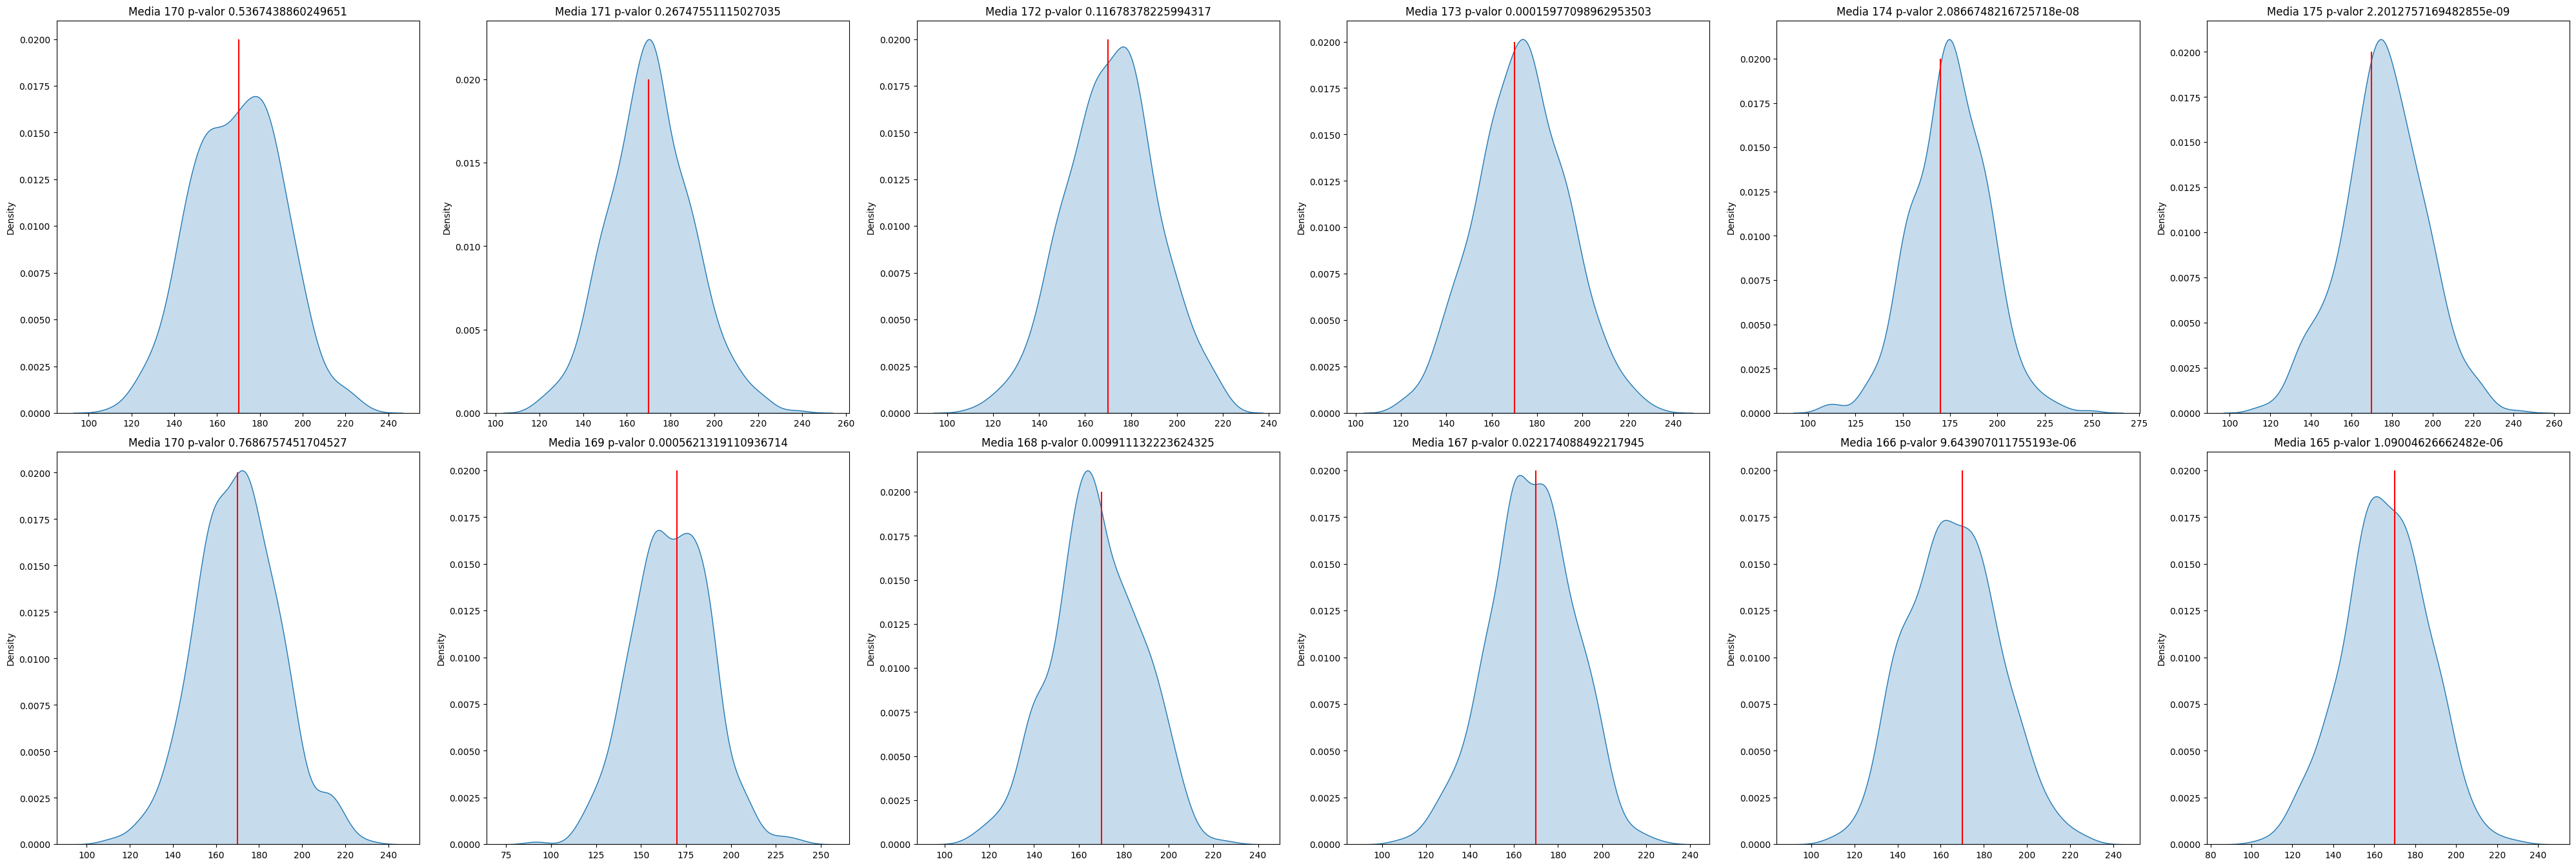

In [20]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(1453)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 20, 500)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.02, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))
    
fig.tight_layout(pad=1) # para evitar solapamientos

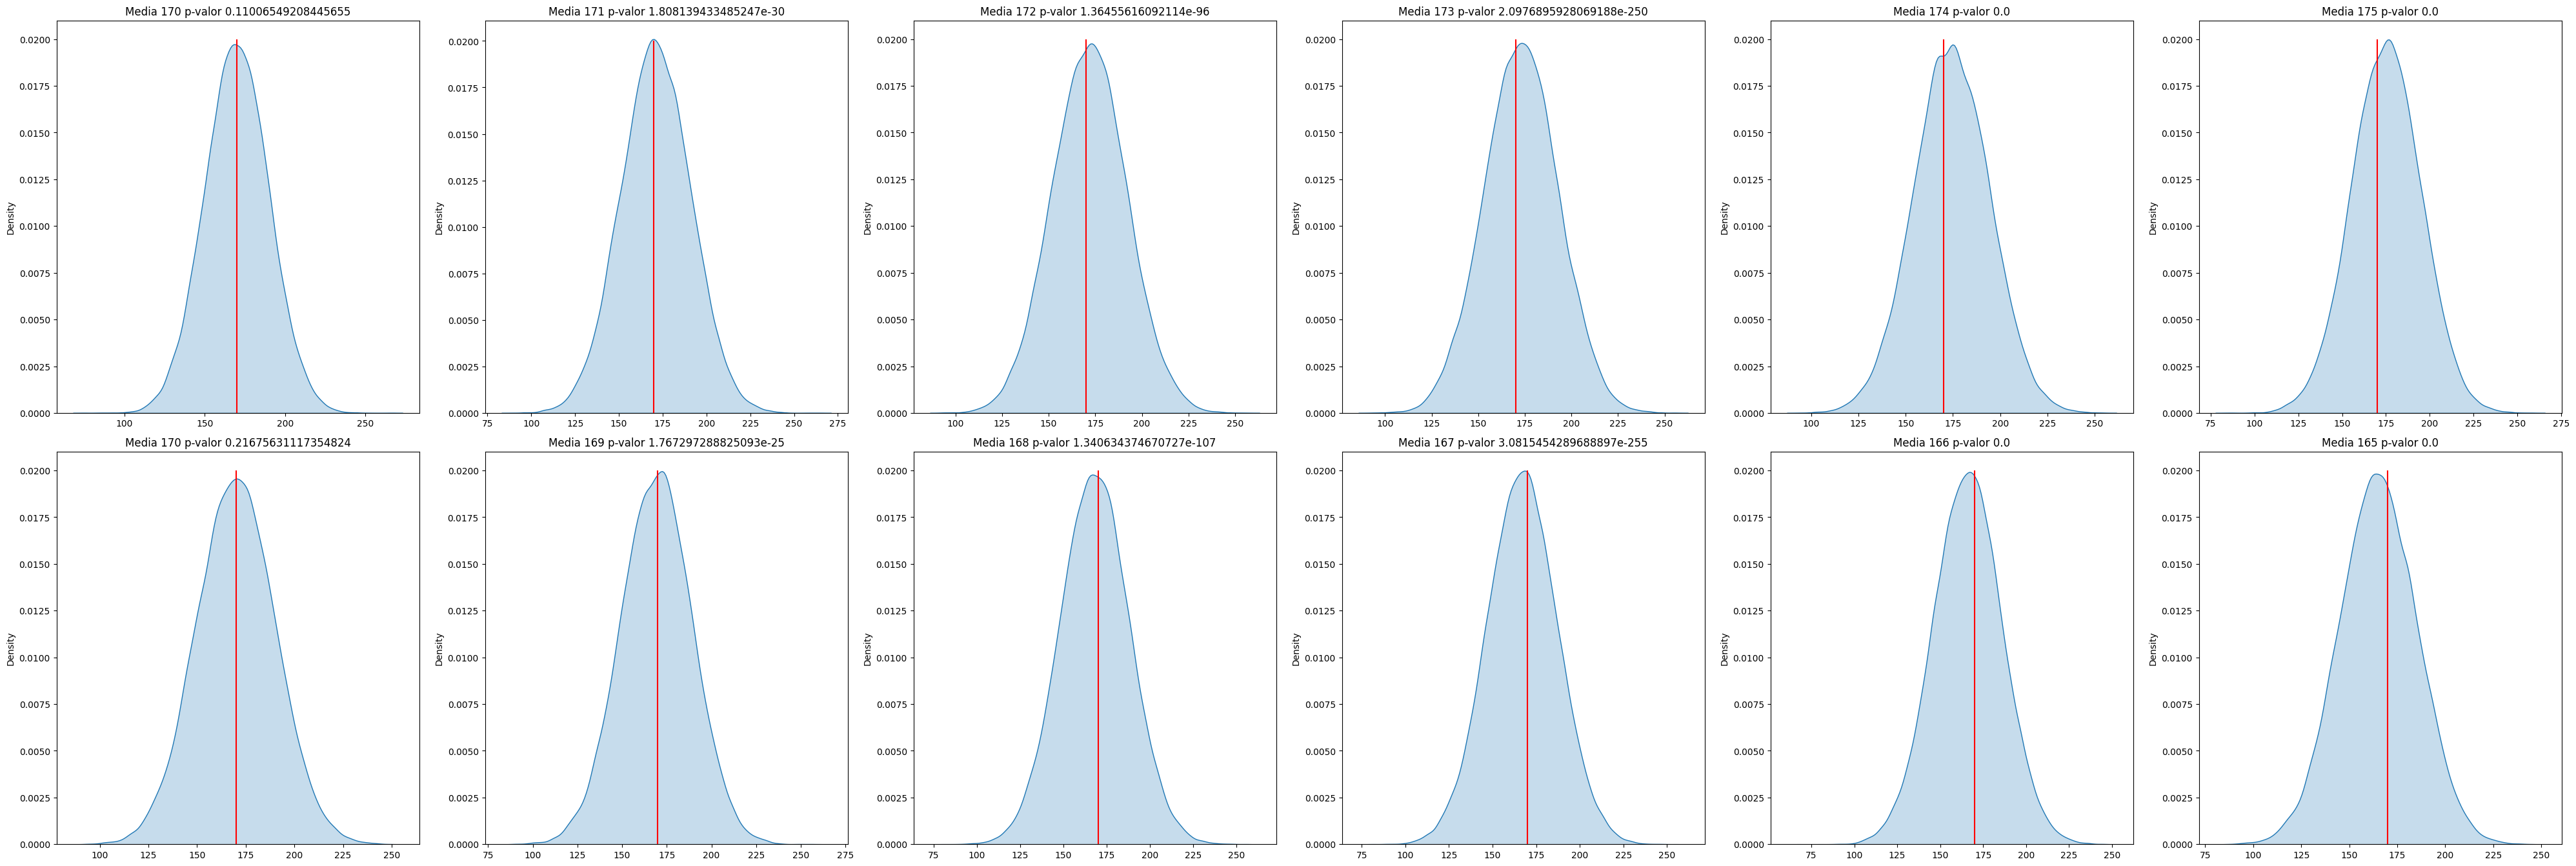

In [27]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(1453)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 20, 50000)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.02, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))
    
fig.tight_layout(pad=1) # para evitar solapamientos


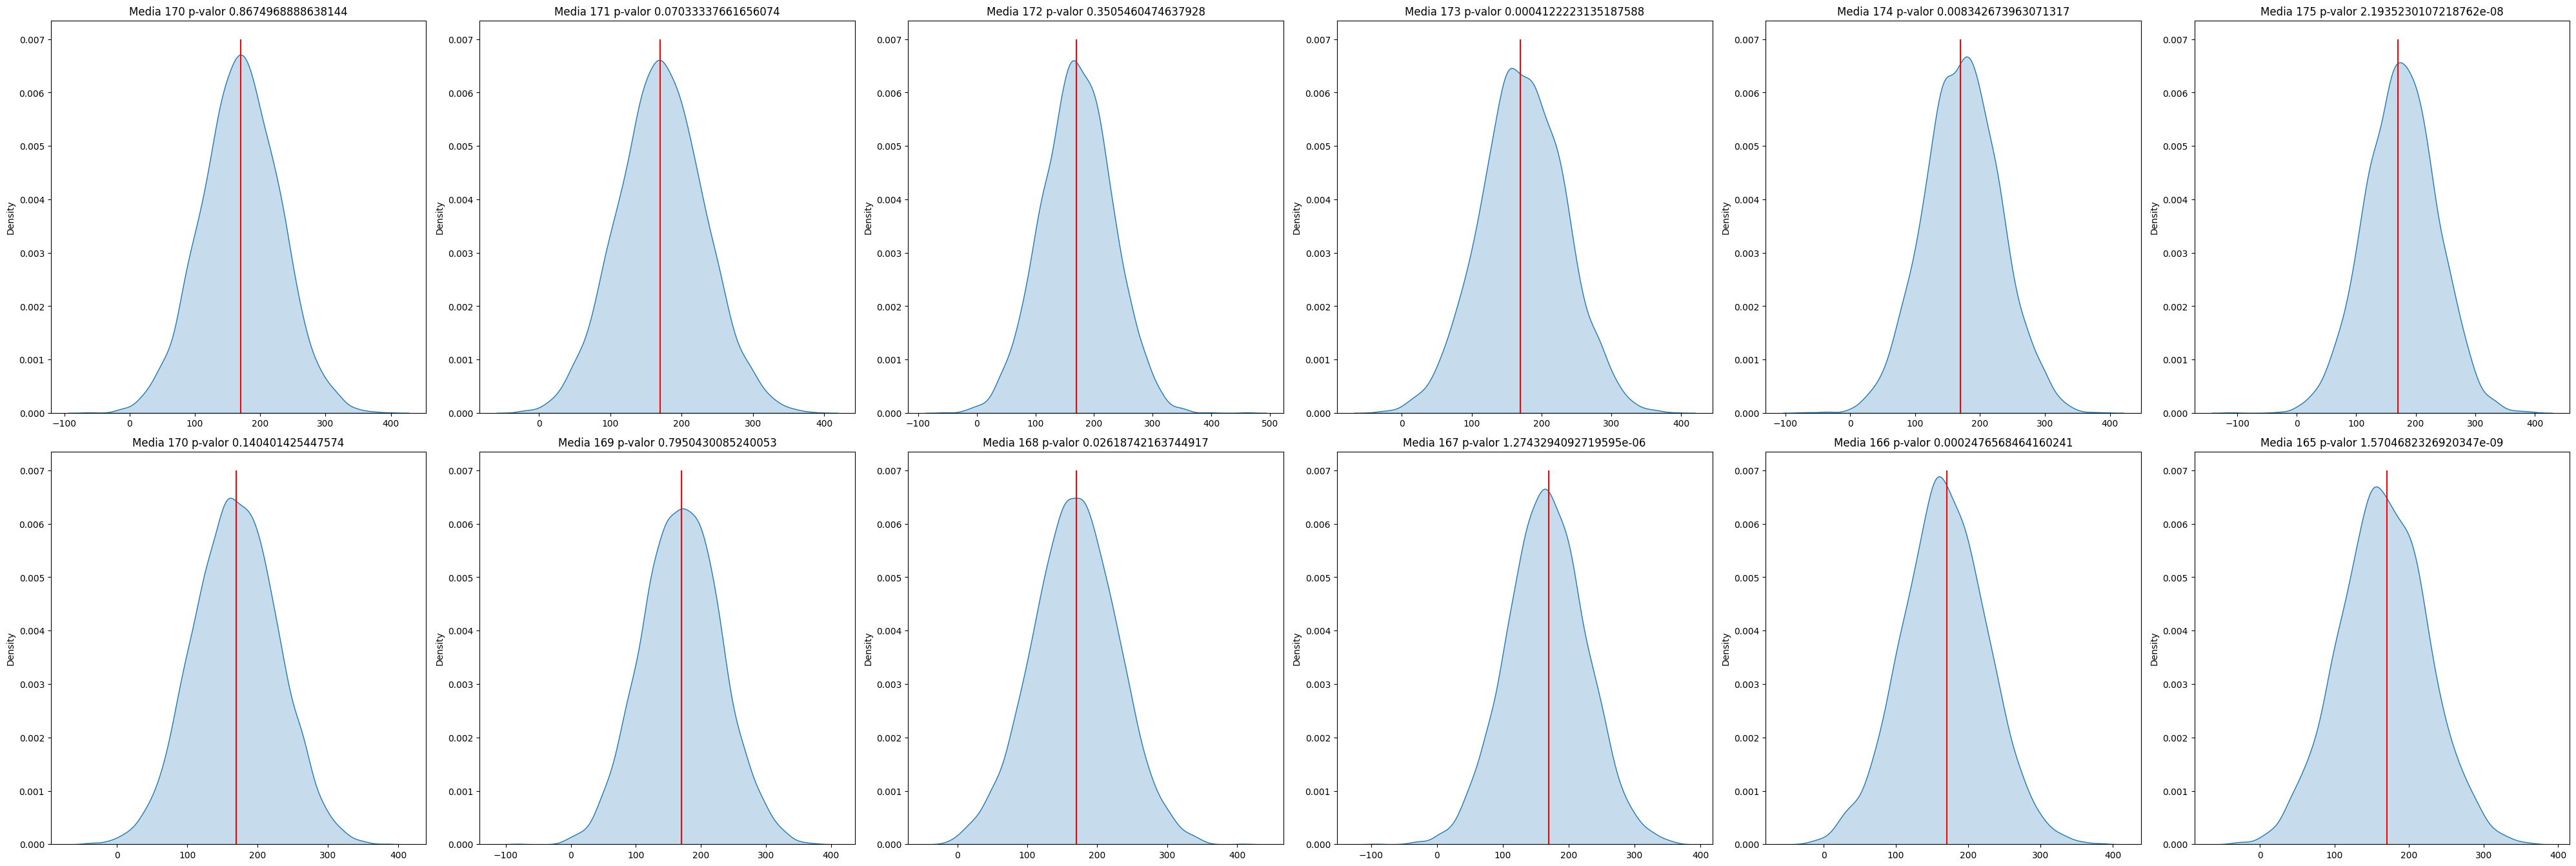

In [29]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(1453)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 60, 5000)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.007, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1])) # El pvalor es el valor que determina si nuestra muestra representa la poblacion
    
fig.tight_layout(pad=1) # para evitar solapamientos


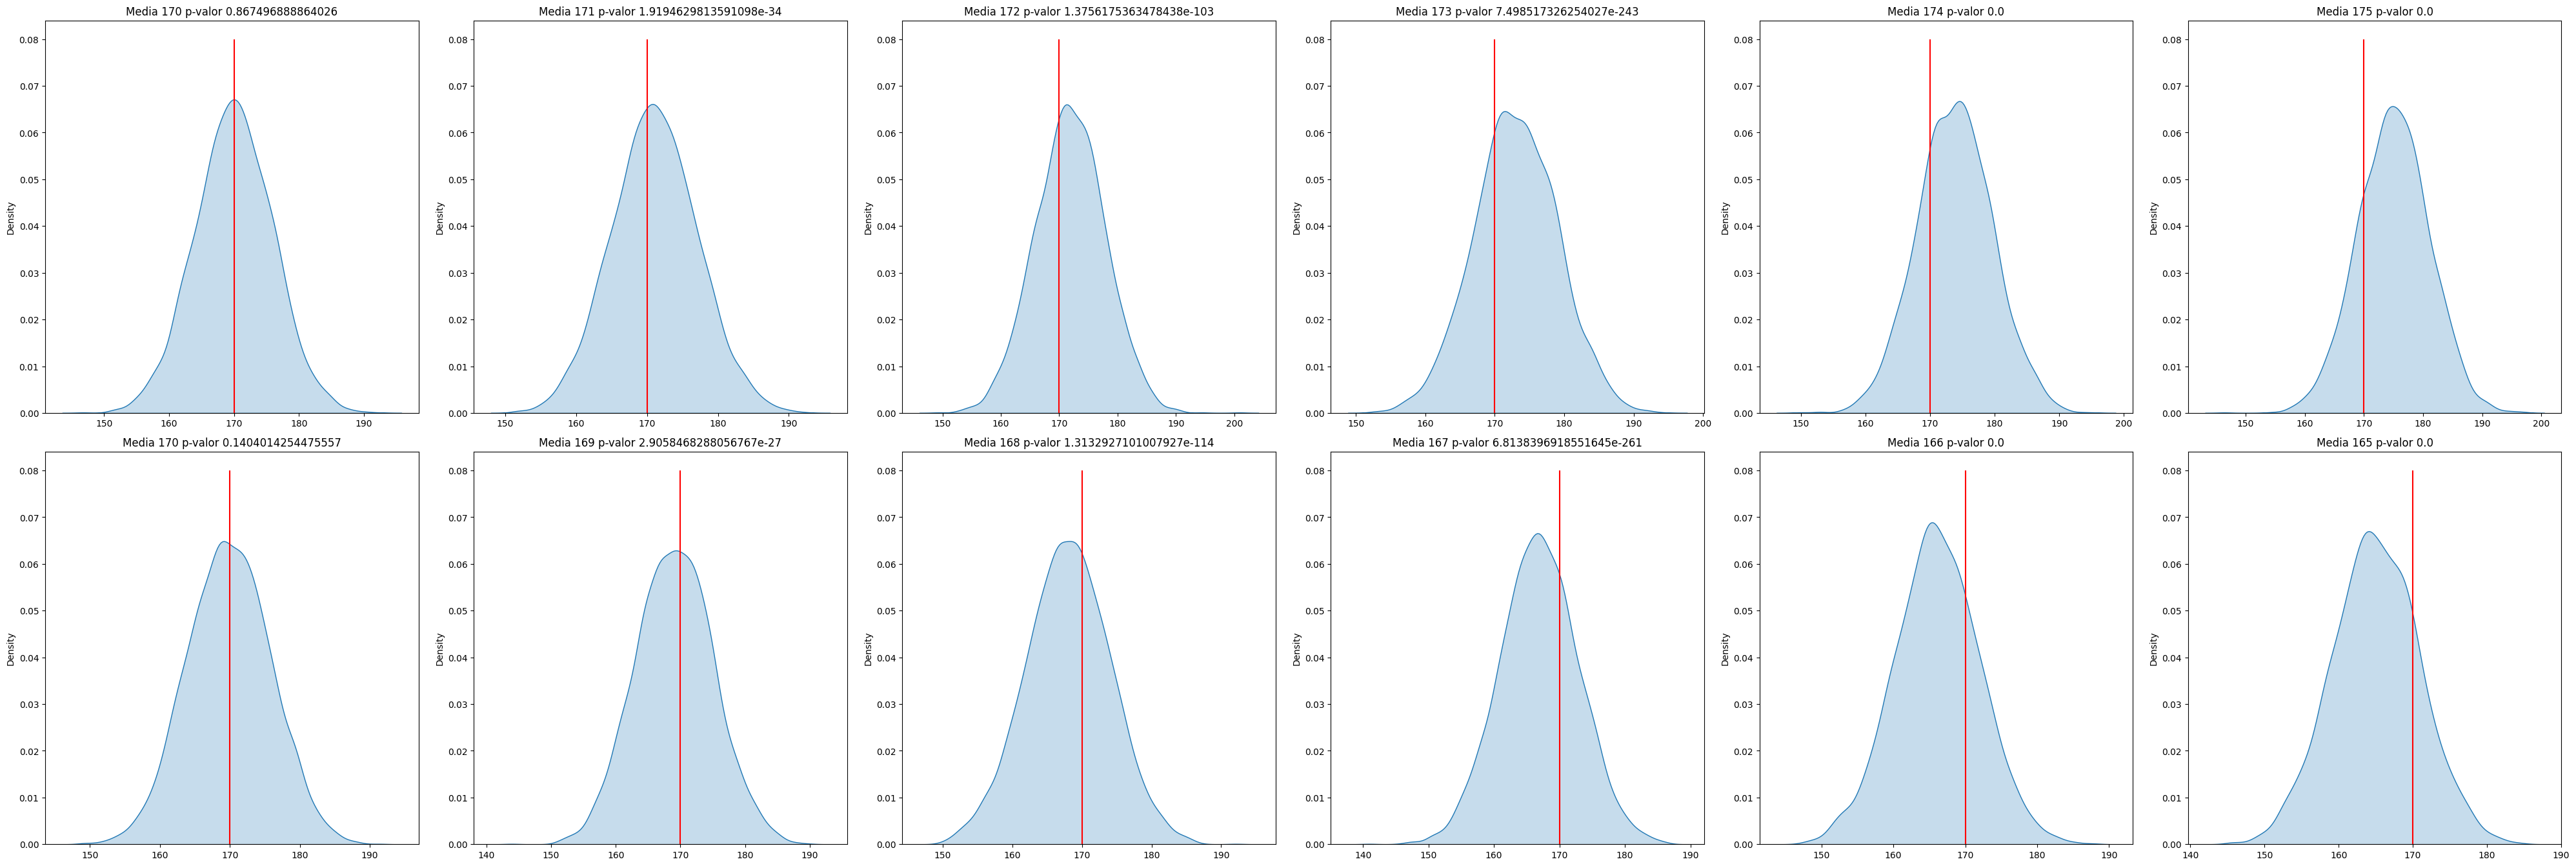

In [23]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(1453)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 6, 5000)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.08, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))

    
fig.tight_layout(pad=1) # para evitar solapamientos